In [1]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_columns = None

Let's see how our [machine Learning](https://www.kamwithk.com/machine-learning-field-guide-ckbbqt0iv025u5ks1a7kgjckx), [project planning](https://www.kamwithk.com/insight-is-king-how-to-get-it-and-avoid-pitfalls-ckbjfohz201ujzqs1lwu5l7xd) and [essential coding tools](https://www.kamwithk.com/the-complete-coding-practitioners-handbook-ck9u1vmgv03kg7bs1e5zwit2z) can be brought to life in a real-world project!
Today we're going through how we can predict how much energy we use daily using temperature data.
We start here with **importing and cleaning data, before graphing and depicting the story of our energy usage and finally modelling it**.

This is the first part of three. Feel free to code along, the full project is on [GitHub](https://github.com/KamWithK/Temp2Enrgy).


# The story
We wake up in the mornings, turn on the heater/air conditioner, find some yogurt from the fridge for breakfast, shave, turn on a computer, get the music rolling and finally get to work.
These tasks all have one thing in common - they use power!
Our heavy reliance on electricity makes it crucial to estimate how much energy we'll need to generate each day.


But, fear not if this seems challenging.
We will take it one step at a time.
At each stage linking back to how it relates to our [ML field guide](https://www.kamwithk.com/machine-learning-field-guide-ckbbqt0iv025u5ks1a7kgjckx).


We start with finding energy and temperature data (can't do much without it 😊).
Ours is from the Bureau of Meteorology and Australian Energy Market Operator, but please do replicate the process for another country (i.e. America).
After a quick and painless download (lucky us), we can briefly review our spreadsheets.
But a look at the data highlights a horrifying truth - there's simply... far too much to deal with!
The merciless cells of numbers, more numbers and categories, are really overwhelming.
It's not really apparent how we'll combine the array of spreadsheets together, nor how we'll be able to analyse, learn from or model it.

We as optimistic folk start by noting down how the data is organised.
The folder with files, where they are and what each contains.
Combining our understanding of the data's structure with the [importing techniques](https://www.kamwithk.com/machine-learning-field-guide-ckbbqt0iv025u5ks1a7kgjckx#chapter-1-importing-data) naturally leads to us overcome our first fear - providing easy access to the data with code.

Next, we seek to eliminate the clumsy mess.
We need to *clean the temperature & energy data* by identifying what information has the greatest impact on our net energy usage!
It once again starts with simple observations of the spreadsheets to get a rough grip on the type of data present.
We are specifically interested in finding weird quirks/recurring patterns which ***could indicate* that something is wrong**.
Once we follow up on each hunch, we can become more confident about the origin of our problems.
This allows us to confidently *decide what to straight-up remove, keep and a quick fix* 🤔 (we don't want to go Rambo 👹 on everything).
Simple stats and graphs form the cornerstone of this analysis!


At this point, we'd have successfully made it through the first and most important part of our project!
After a brief celebration, we can move onto combining our two separate datasets (one for energy and one for temperature).
This allows us to correlate the two.
Finally, we're able to depict our story of how we use energy through each envigorating day, month and year... with the help of the trends and patterns we see in graphs!
What on Earth would be more satisfying?
Well, a few things... but let's not forget to create a model (it'll be fun) to show off to all our friends!
Let's not jump the gun though... this will all be in the next two tutorials.

# The Epochs
## Chapter 1 - Importing Data
> Data comes in all kinds of shapes and sizes and so the process we use to get everything into code often varies.

Through analysing the files available we have found out **how our data is structured**.
We start on a high level, noticing that there are many temperature and energy spreadsheets formatted as CSVs.
Although there's an incredible number of them, it is just because the data was divided into small chunks.
Each CSV is a continuation of the last one.
The actual temperature spreadsheets contain dates, along with a variety of temperature, humidity and precipitation measurements.
Our energy files are far more basic, containing just dates, energy demand history, prices (RRP) and whether the data was manually or automatically logged.
The measurements have been made on a 30-minute basis.

> Divide and conquer!

As we can see, all of this information comes together to form an intuitive understanding of the raw data.
Of course, we *don't yet understand everything we'll need to perform our analysis, but we have enough to transition from having raw data to useable code* 🥳!

To transition into code, we compare our findings, to our [importing techniques](https://www.kamwithk.com/machine-learning-field-guide-ckbbqt0iv025u5ks1a7kgjckx#chapter-1-importing-data).
We know that we have a list of spreadsheets to be combined, so we can first form lists and then use Pandas ```concat``` to stack them together.

In [ ]:
energy_locations = os.listdir("../Data/Energy")
temperature_locations = os.listdir("../Data/Temperature")

energy_CSVs = [pd.read_csv("../Data/Energy/" + location) for location in energy_locations]
temperature_CSVs = [pd.read_csv("../Data/Temperature/" + location) for location in temperature_locations if "Data" in location]

In [3]:
energy_data = pd.concat(energy_CSVs, ignore_index=True)
temperature_data = pd.concat(temperature_CSVs, ignore_index=True)

Now, believe it or not, we've done 90% of the importing, the only thing left is to ensure our features (columns) are named succinctly and consistently.
Through renaming our columns (like below), we make it clear what is in each column.
Future us will definitely be grateful!

In [4]:
energy_data.columns
temperature_data.columns

Index(['REGION', 'SETTLEMENTDATE', 'TOTALDEMAND', 'RRP', 'PERIODTYPE'], dtype='object')

Index(['hm', 'Station Number', 'Year Month Day Hour Minutes in YYYY', 'MM',
       'DD', 'HH24', 'MI format in Local time',
       'Year Month Day Hour Minutes in YYYY.1', 'MM.1', 'DD.1', 'HH24.1',
       'MI format in Local standard time',
       'Precipitation since 9am local time in mm',
       'Quality of precipitation since 9am local time',
       'Air Temperature in degrees C', 'Quality of air temperature',
       'Wet bulb temperature in degrees C', 'Quality of Wet bulb temperature',
       'Dew point temperature in degrees C',
       'Quality of dew point temperature', 'Relative humidity in percentage %',
       'Quality of relative humidity', 'Wind speed in km/h',
       'Wind speed quality', 'Wind direction in degrees true',
       'Wind direction quality',
       'Speed of maximum windgust in last 10 minutes in  km/h',
       'Quality of speed of maximum windgust in last 10 minutes',
       'Mean sea level pressure in hPa', 'Quality of mean sea level pressure',
       'Stati

In [5]:
energy_data.columns = ["Region", "Date", "TotalDemand", "RRP", "PeriodType"]
temperature_data.columns = [
    "HM", "StationNumber", "Year1", "Month1", "Day1", "Hour1", "Minute1", "Year", "Month", "Day", "Hour", "Minute", "Precipitation", "PrecipitationQuality",
    "AirTemperature", "AirTemperatureQuality", "WetBulbTemperature", "WetBulbTemperatureQuality", "DewTemperature", "DewTemperatureQuality", "RelativeHumidity",
    "RelativeHumidityQuality", "WindSpeed", "WindSpeedQuality", "WindDirection", "WindDirectionQuality", "WindgustSpeed", "WindgustSpeedQuality", "SeaPressure",
    "SeaPressureQuality", "StationPressure", "StationPressureQuality", "AWSFlag", "#"
]

Now be proud because we just finished the first part of our journey!
Now that we've gotten the ball rolling, things will be smoother sailing from here on out.

## Chapter 2 - Data Cleaning
### Formatting the data
> Everyone is driven insane by missing data, but there's always a light at the end of the tunnel.

There's good and bad news, so I'll start with the good news first.
We've gone through our initial phase of getting everything together and so we now have a bare-bones understanding of what's available to us/how to access it.
We can view our data using the ```energy_data``` and ```temperature_data``` dataframes!

Now for the bad news.
Although we likely haven't noticed it yet, our data is far from perfect.
We have loads of missing (empty) cells, along with duplicated and malformatted data.
But don't be disheartened, because this isn't a rare cataclysmic disaster:
It happens all the time 😎 (what's not to like about it?) 😎.


This process can appear threatening since everything just seems... messed up.
Now insight and experience do help a lot, BUT but but... that doesn't mean that it's impossible for us mortals!
There's one thing we can do to overcome this - work like mad scientists!
We can identify our datasets quirks/issues, and then test every technique we think off 🤯.
Our techniques come from the [field guide](https://www.kamwithk.com/machine-learning-field-guide-ckbbqt0iv025u5ks1a7kgjckx#chapter-2-data-cleaning) (NEVER reinvent the wheel)!

Just to doubly make sure we're not running stray, here are the problems we're looking for:
* Completely empty columns/rows
* Duplicate values
* Inaccurate/generic datatypes

Yes, there are only three right now, but... don't forget that we won't robust analysis!
So actually dealing with these problems in a concrete fashion does take a little bit of effort (don't be too dodgy, that right's reserved for politicians - no offence).


*Final disclaimer - there's a lot to take in, so please take a deep breath, drink some coffee and slowly look for patterns.*

In [6]:
energy_data
temperature_data

,Region,Date,TotalDemand,RRP,PeriodType
0,VIC1,2000/04/01 00:30,5132.32333,26.01,TRADE
1,VIC1,2000/04/01 01:00,4928.59500,15.58,TRADE
2,VIC1,2000/04/01 01:30,5155.45500,17.45,TRADE
3,VIC1,2000/04/01 02:00,4991.13833,15.12,TRADE
4,VIC1,2000/04/01 02:30,4777.00167,17.69,TRADE
...,...,...,...,...,...
1658960,TAS1,2018/05/31 22:00:00,1297.12000,78.32,TRADE
1658961,TAS1,2018/05/31 22:30:00,1239.41000,78.33,TRADE
1658962,TAS1,2018/05/31 23:00:00,1194.16000,78.32,TRADE
1658963,TAS1,2018/05/31 23:30:00,1154.50000,78.32,TRADE


,HM,StationNumber,Year1,Month1,Day1,Hour1,Minute1,Year,Month,Day,Hour,Minute,Precipitation,PrecipitationQuality,AirTemperature,AirTemperatureQuality,WetBulbTemperature,WetBulbTemperatureQuality,DewTemperature,DewTemperatureQuality,RelativeHumidity,RelativeHumidityQuality,WindSpeed,WindSpeedQuality,WindDirection,WindDirectionQuality,WindgustSpeed,WindgustSpeedQuality,SeaPressure,SeaPressureQuality,StationPressure,StationPressureQuality,AWSFlag,#
0,hm,94029,2000,1,1,2,0,2000,1,1,1,0,0.8,N,10.4,N,7.3,N,3.3,N,61,N,11.2,N,220,N,13.0,N,1019.3,N,1013.0,N,,#
1,hm,94029,2000,1,1,2,30,2000,1,1,1,30,0.8,N,10.3,N,7.1,N,2.9,N,60,N,9.4,N,240,N,11.2,N,1019.1,N,1012.8,N,,#
2,hm,94029,2000,1,1,3,0,2000,1,1,2,0,0.8,N,10.3,N,6.9,N,2.3,N,58,N,13.0,N,240,N,18.4,N,1018.9,N,1012.6,N,,#
3,hm,94029,2000,1,1,3,30,2000,1,1,2,30,0.8,N,10.3,N,6.9,N,2.3,N,58,N,13.0,N,240,N,18.4,N,1018.7,N,1012.4,N,,#
4,hm,94029,2000,1,1,4,0,2000,1,1,3,0,0.8,N,10.1,N,6.9,N,2.6,N,60,N,11.2,N,260,N,13.0,N,1018.5,N,1012.2,N,,#
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1826239,hm,23090,2020,1,20,7,30,2020,1,20,6,30,9.4,N,15.1,N,14.6,N,14.2,N,94,N,7.6,N,240,N,14.8,N,1010.3,N,1004.4,N,1,#
1826240,hm,23090,2020,1,20,8,0,2020,1,20,7,0,9.4,N,15.5,N,14.7,N,14.1,N,91,N,9.4,N,230,N,16.6,N,1010.4,N,1004.5,N,1,#
1826241,hm,23090,2020,1,20,8,30,2020,1,20,7,30,9.4,N,15.7,N,14.8,N,14.1,N,90,N,11.2,N,210,N,29.5,N,1010.7,N,1004.8,N,1,#
1826242,hm,23090,2020,1,20,9,0,2020,1,20,8,0,9.6,N,15.5,N,14.8,N,14.3,N,93,N,9.4,N,220,N,16.6,N,1011,N,1005.1,N,1,#


We can see that columns like ```PrecipitationQuality``` and ```HM``` seem to have the same value throughout.
To amend this we can remove columns with two or fewer unique elements.

In [7]:
def remove_non_uniques(dataframe: pd.DataFrame, filter = []):
    remove = [name for name, series in dataframe.items() if len(series.unique()) <= 2 and not name in filter]
    dataframe.drop(remove, axis=1, inplace=True)
    return remove

print("Removed:")
remove_non_uniques(energy_data)
remove_non_uniques(temperature_data)

Removed:


['PeriodType']

['HM',
 'PrecipitationQuality',
 'AirTemperatureQuality',
 'WetBulbTemperatureQuality',
 'DewTemperatureQuality',
 'RelativeHumidityQuality',
 'WindSpeedQuality',
 'WindDirectionQuality',
 'WindgustSpeedQuality',
 'SeaPressureQuality',
 'StationPressureQuality',
 '#']

Duplicate rows can also be removed.
This is far easier!

In [8]:
energy_data.drop_duplicates(inplace=True)
temperature_data.drop_duplicates(inplace=True)

The last thing is to check our datatypes.
This seems unnecessary here, yet modelling and graphing libraries are quite touchy about datatypes.

The process is quite straightforwards, look at the column/what it contains and then compare that to the actual datatype.
With a large number of columns, it can be best to start by looking at dates and categories since they're almost always misinterpreted (as objects, floats or integers).
In general ```object``` should only be used for strings.

In [9]:
energy_data.dtypes
temperature_data.dtypes

Region          object
Date            object
TotalDemand    float64
RRP            float64
dtype: object

StationNumber          int64
Year1                  int64
Month1                 int64
Day1                   int64
Hour1                  int64
Minute1                int64
Year                   int64
Month                  int64
Day                    int64
Hour                   int64
Minute                 int64
Precipitation         object
AirTemperature        object
WetBulbTemperature    object
DewTemperature        object
RelativeHumidity      object
WindSpeed             object
WindDirection         object
WindgustSpeed         object
SeaPressure           object
StationPressure       object
AWSFlag               object
dtype: object

In our case, we have not just one set of dates, but two (damn, the BOM data collection team needs to chill) 🥴.
As we predicted, the dates are integers and spread out across multiple columns (one for the year, one for the month, day, hour and minute).


We can start by getting rid of the duplicated set of dates (the second was due to daylight saving), and then we can parse the remaining date columns.
This formats our data in the nice orderly way we desired!

In [10]:
# Remove extra dates
temperature_data.drop(["Year1", "Month1", "Day1", "Hour1", "Minute1"], axis=1, inplace=True)

# Reformat dates into Pandas' datatime64 objects
# Replacing old format
temperature_data["Date"] = pd.to_datetime(temperature_data[["Year", "Month", "Day", "Hour", "Minute"]])
energy_data["Date"] = pd.to_datetime(energy_data["Date"])

temperature_data.drop(["Year", "Month", "Day", "Hour", "Minute"], axis=1, inplace=True)

Now we can also see a few problems with station numbers (where measurements were made), ```AWSFlag```'s (whether data was manually collected), temperature, humidity, pressure and precipitation measurements.
We do need to change these datatypes, but to do so we'll need to go slightly off the books as converting datatypes using the standard ```.astype("category")``` throws a few errors.
We can overcome these by noting down what the complaint is about, accounting for it and then trying to run the above function once again.


Just to be sure we're all on the same page, here's a short summary of the errors we're dealing with:
* Leading/trailling spaces (so "12" becomes "       12     ")
* Random hashtags occasionally present (so 99.99% of cells will contain numbers, but then one will contain "###")
* There's a small amount of missing categorical data

We can remove the leading and trailing spaces by using ```.str.strip()```.
Next, to remove the rouge hashtag, we can use Pandas' ```replace``` function to overwrite it with ```np.NaN``` (the default datatype used for null data).
To finish off, we can just assume that any missing data was manually collected (worst case scenario).
The ```fillna``` and ```replace``` functions are both needed, as Pandas treats ```np.NaN``` and empty strings ("") differently.

In [11]:
def to_object_columns(lambda_function):
    string_columns = temperature_data.select_dtypes("object").columns
    temperature_data[string_columns] = temperature_data[string_columns].apply(lambda_function)

In [12]:
to_object_columns(lambda column: column.str.strip())

In [13]:
temperature_data["AWSFlag"] = temperature_data["AWSFlag"].replace("", 0).astype("category")
temperature_data["AWSFlag"].fillna(0, inplace=True)
temperature_data["RelativeHumidity"] = temperature_data["RelativeHumidity"].replace("###", np.NaN)

In [14]:
to_object_columns(lambda column: pd.to_numeric(column))

In [15]:
temperature_data.dtypes

StationNumber                  int64
Precipitation                float64
AirTemperature               float64
WetBulbTemperature           float64
DewTemperature               float64
RelativeHumidity             float64
WindSpeed                    float64
WindDirection                float64
WindgustSpeed                float64
SeaPressure                  float64
StationPressure              float64
AWSFlag                     category
Date                  datetime64[ns]
dtype: object

There is one final thing we can do to improve how our data is formatted.
That is to ensure that the column used to identify where our temperature and energy measurements were made both use the same categories.

Since we only have one station per region, we can replace the separate region codes with their short forms.
Note that this information was provided in the dataset notes (don't worry, we're not expected to remember that 94029 means Victoria).
To do these conversions we just create two dictionaries.
Each key-value pair represents the old code to map to the new one (so map "SA1" to "SA" and 23090 to "SA").
The Pandas ```map``` function does the rest of the work.

In [16]:
energy_data["Region"].unique()
temperature_data["StationNumber"].unique()

array(['VIC1', 'SA1', 'TAS1', 'QLD1', 'NSW1'], dtype=object)

array([94029, 86071, 66062, 40913, 86338, 23090])

In [17]:
region_remove_number_map = {"SA1": "SA", "QLD1": "QLD", "NSW1": "NSW", "VIC1": "VIC", "TAS1": "TAS"}
station_to_region_map = {23090: "SA", 40913: "QLD", 66062: "NSW", 86071: "VIC", 94029: "TAS", 86338: "VIC"}

temperature_data["Region"] = temperature_data["StationNumber"].map(station_to_region_map)
energy_data["Region"] = energy_data["Region"].map(region_remove_number_map)

temperature_data.drop("StationNumber", axis=1, inplace=True)

One last thing to note about the way our data is formatted (promise).
We currently don't index/sort our data in any specific way, even though it is a time series.
So we can use ```set_index``` to change that.

In [18]:
energy_data.set_index("Date", inplace=True)
temperature_data.set_index("Date", inplace=True)

## Dealing with missing data
So far we've made sure that all our data can be easily accessed without any troubles.
We've made sure everything is formatted right, and now we can use it... well kind of.
Although our data is correctly formatted, it doesn't quite mean that it's meaningful, useful or even present!

We can get through this though, we just need to be strategic.
The key thing to remember here:
> Don't do more work than necessary!

**Our ultimate goal isn't to fix everything, but to remove what definitely is useless and enhance the quality of what could be especially interesting/useful**.
This process aids us in knowing we're making solid, generalisable and reasonable predictions or interpretations (there's little point in the whole process otherwise).


One nice way to do this is to use graphs.
Through visualising our data we can easily spot where it's missing, where outliers exist and where two features are correlated.
We, of course, can't do *all of this on one plot*, and so we'll start by just looking for missing data.
Sections of large or frequent gaps are the potentially problematic regions we're looking for.
If these don't exist (i.e. there's little to no missing data), then our work is reduced.

Keep in mind that we have two datasets (not one), categorised by states!
As the data is recorded in separate states, grouping it all together will not correctly represent it.
Hence, we will have a series of plots (one per state) for each feature we want to analyse.
We are slightly lucky though because there's only one meaningful energy feature (```TotalDemand```), which we will see has little to no missing data.

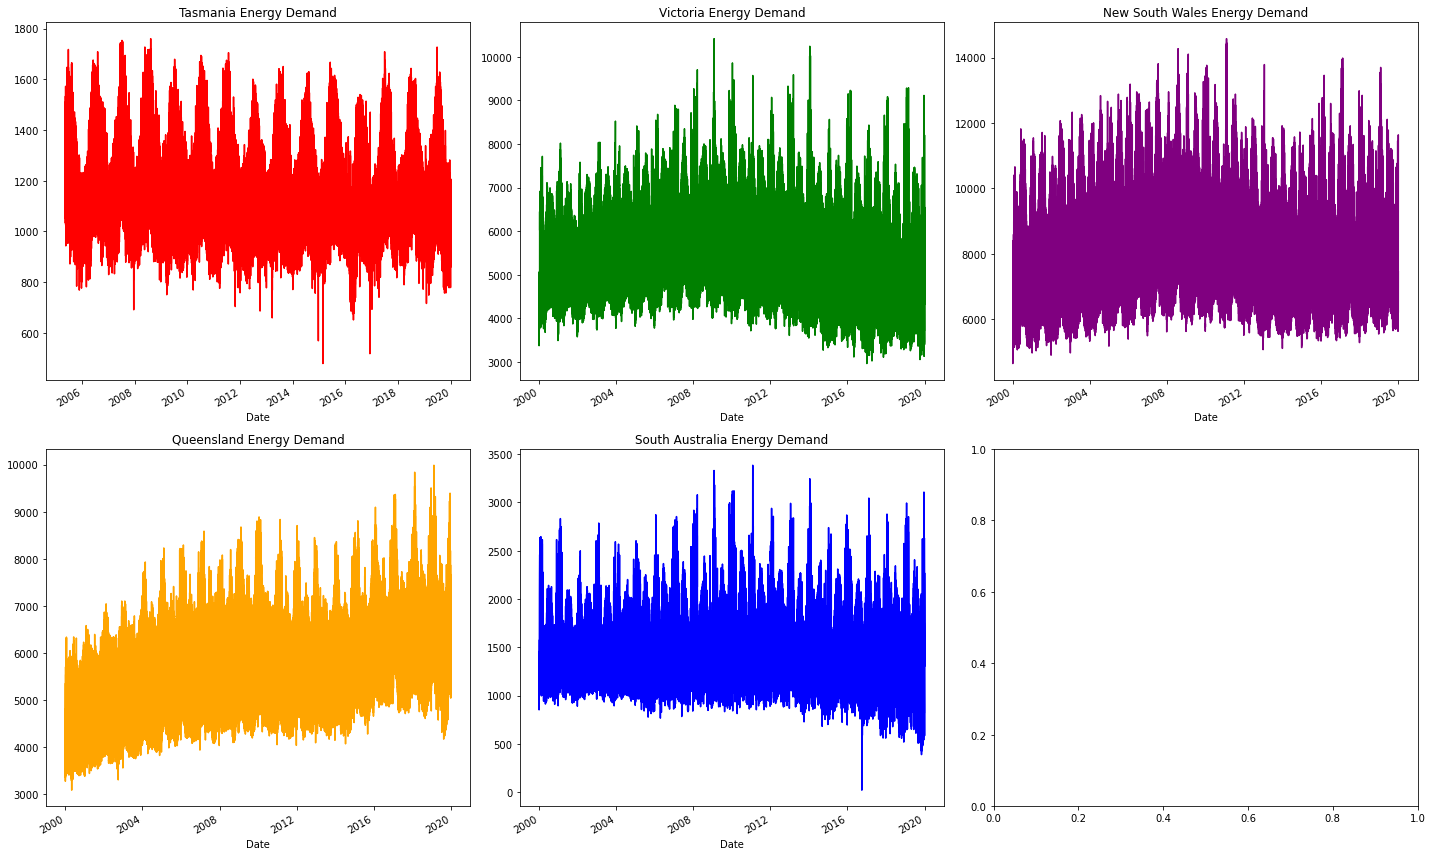

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12), tight_layout=True)

energy_data.groupby("Region").get_group("TAS")["TotalDemand"]["2000":"2019"].plot(color= "red",title="Tasmania Energy Demand",ax=axes[0,0]);
energy_data.groupby("Region").get_group("VIC")["TotalDemand"]["2000":"2019"].plot(color= "green",title="Victoria Energy Demand",ax=axes[0,1]);
energy_data.groupby("Region").get_group("NSW")["TotalDemand"]["2000":"2019"].plot(color= "purple",title="New South Wales Energy Demand",ax=axes[0,2]);
energy_data.groupby("Region").get_group("QLD")["TotalDemand"]["2000":"2019"].plot(color= "orange",title="Queensland Energy Demand",ax=axes[1,0]);
energy_data.groupby("Region").get_group("SA")["TotalDemand"]["2000":"2019"].plot(color="blue",title="South Australia Energy Demand",ax=axes[1,1]);

As we can see the plots are all continuous, this is how we confirm that there is no major source of missing data.
There are a variety of other trends here, but we'll leave those for later!


Now to move onto weather data.
This is where we'll see the usefulness of graphs!
Although it's possible to simply find the percent of missing data, the graphs easily show the nature of the null values.
We immediately see where it's missing, which itself suggests what method should be used (i.e. removing the data, resampling, etc).


We start by looking at ```WetBulbTemperature```.
We will see that it is largely intact just like our energy data.
We will then see ```AirTemperature```, and it'll be... rough and tattered.


For brevity, only a few key graphs are included here.
However, loads more can be graphed (please do play around with the code to see what else can be done)!
The problems with ```AirTemperature``` are similar to those in the following features:
* Precipitation
* AirTemperature
* DewTemperature
* RelativeHumidity
* WindSpeed
* WindDirection
* WindgustSpeed

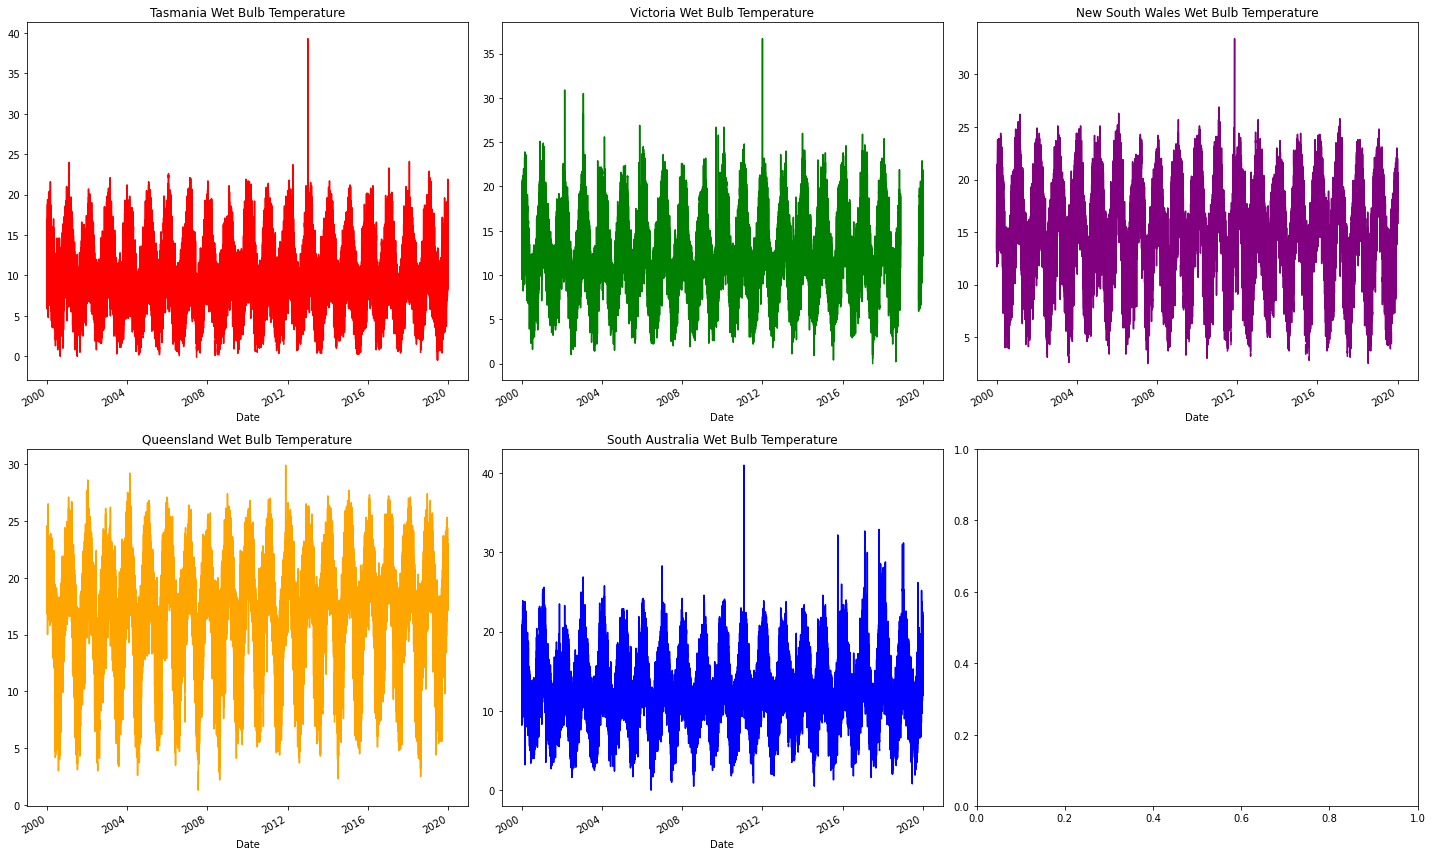

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12), tight_layout=True)

temperature_data.groupby("Region").get_group("TAS")["WetBulbTemperature"]["2000":"2019"].plot(color= "red",title="Tasmania Wet Bulb Temperature",ax=axes[0,0]);
temperature_data.groupby("Region").get_group("VIC")["WetBulbTemperature"]["2000":"2019"].plot(color= "green",title="Victoria Wet Bulb Temperature",ax=axes[0,1]);
temperature_data.groupby("Region").get_group("NSW")["WetBulbTemperature"]["2000":"2019"].plot(color= "purple",title="New South Wales Wet Bulb Temperature",ax=axes[0,2]);
temperature_data.groupby("Region").get_group("QLD")["WetBulbTemperature"]["2000":"2019"].plot(color= "orange",title="Queensland Wet Bulb Temperature",ax=axes[1,0]);
temperature_data.groupby("Region").get_group("SA")["WetBulbTemperature"]["2000":"2019"].plot(color= "blue",title="South Australia Wet Bulb Temperature",ax=axes[1,1]);

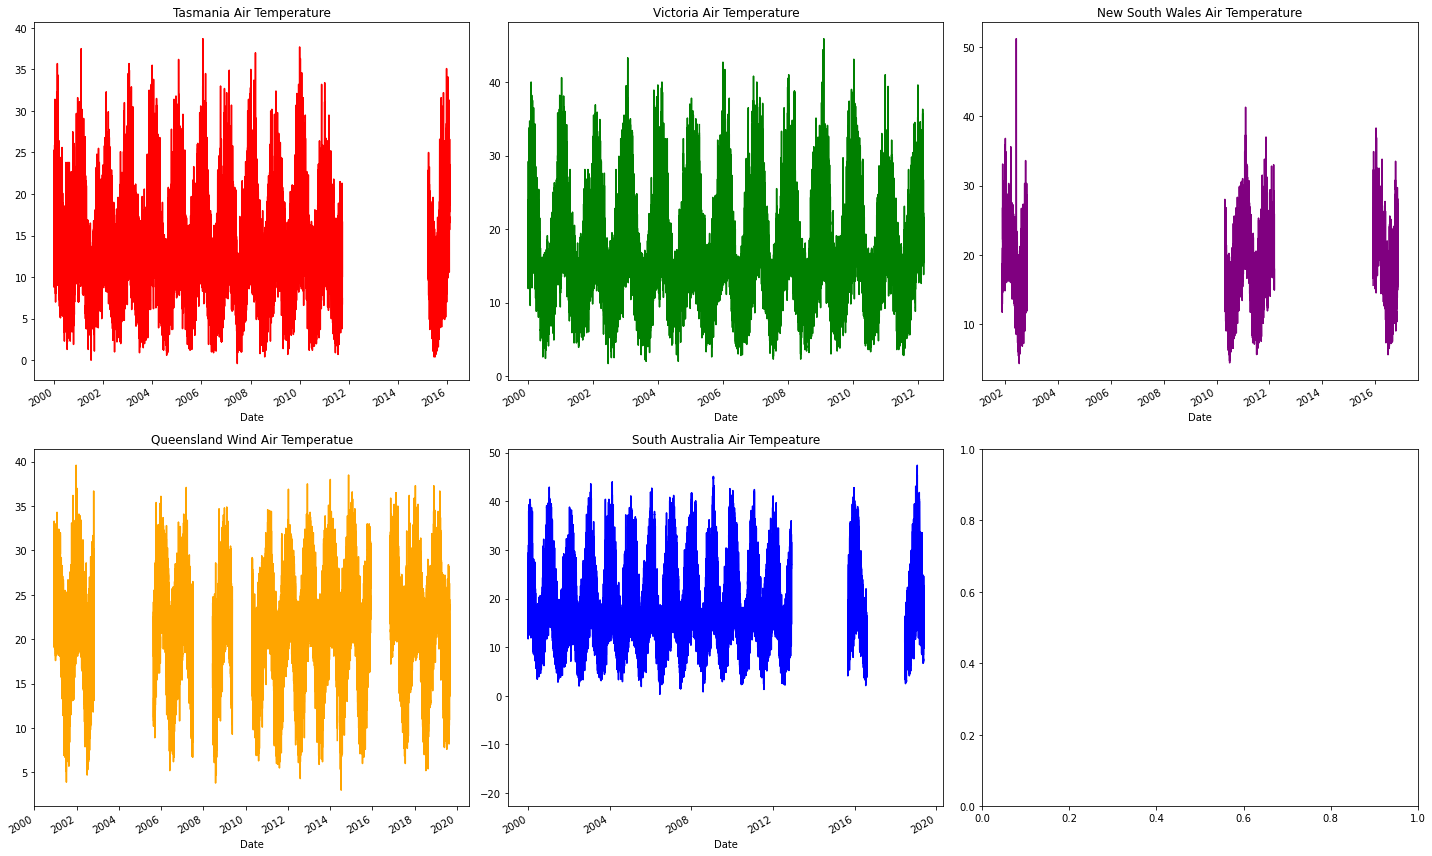

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12), tight_layout=True)

temperature_data.groupby("Region").get_group("TAS")["AirTemperature"]["2000":"2019"].plot(color= "red",title="Tasmania Air Temperature",ax=axes[0,0]);
temperature_data.groupby("Region").get_group("VIC")["AirTemperature"]["2000":"2019"].plot(color= "green",title="Victoria Air Temperature",ax=axes[0,1]);
temperature_data.groupby("Region").get_group("NSW")["AirTemperature"]["2000":"2019"].plot(color= "purple",title="New South Wales Air Temperature",ax=axes[0,2]);
temperature_data.groupby("Region").get_group("QLD")["AirTemperature"]["2000":"2019"].plot(color= "orange",title="Queensland Wind Air Temperatue",ax=axes[1,0]);
temperature_data.groupby("Region").get_group("SA")["AirTemperature"]["2000":"2019"].plot(color= "blue",title="South Australia Air Tempeature",ax=axes[1,1]);

The missing months to years of missing (the blank sections) air temperature data at random places in the graph indicates that it's not worth looking into further.
This actually **isn't a bad thing, it allows us to focus more on what is present**: energy demand and wet bulb temperature.

These graphs show large or regular sections of missing data, however, they don't show the small amounts randomly distributed.
We for safety can quickly use Pandas ```DataFrame.isnull``` to find which values are null.
It immediately shows that our energy data is in perfect condition (nothing missing), whilst most temperature columns have a very large proportion missing!

We'll remove most features since they'd require us to sacrifice large numbers of rows.
What we want to keep (i.e. ```WetBulbTemperature```) can have its missing values interpolated (deduce what the value should be based on its surrounding values).

In [22]:
def get_null_counts(dataframe: pd.DataFrame):
    return dataframe.isnull().mean()[dataframe.isnull().mean() > 0]

In [23]:
get_null_counts(energy_data)
get_null_counts(temperature_data)

Series([], dtype: float64)

Precipitation         0.229916
AirTemperature        0.444437
WetBulbTemperature    0.011324
DewTemperature        0.375311
RelativeHumidity      0.375312
WindSpeed             0.532966
WindDirection         0.432305
WindgustSpeed         0.403183
SeaPressure           0.137730
StationPressure       0.011135
dtype: float64

In [24]:
remove_columns = ["Precipitation", "AirTemperature", "DewTemperature", "RelativeHumidity", "WindSpeed", "WindDirection", "WindgustSpeed"]
temperature_data.drop(remove_columns, axis=1, inplace=True)

# Note that using inplace currently throws an error
# So interpolated columns must be manually overridden
missing_columns = list(get_null_counts(temperature_data).keys())
temperature_data[missing_columns] = temperature_data[missing_columns].interpolate(method="time")

## Combining energy and temperature data
Now, for the very last step.
Combining together the two dataframes into one, so we can associate our temperature data with energy demand.

We can use the ```merge_asof``` function to merge the two datasets.
This function merges the *closest values together*.
Since we have data grouped by region, we specify that with the ```by``` parameter.
We can choose to only merge energy and temperature entries which are 30-minutes or less apart.

In [25]:
energy_data.sort_index(inplace=True)
temperature_data.sort_index(inplace=True)

data = pd.merge_asof(energy_data, temperature_data, left_index=True, right_index=True, by="Region", tolerance=pd.Timedelta("30 min"))

To check whether the merge has happened successfully, we can check how many null values are present.
This works since unpaired rows cause null values.

In [26]:
get_null_counts(data)
data.dropna(inplace=True)

WetBulbTemperature    0.001634
SeaPressure           0.001634
StationPressure       0.001634
AWSFlag               0.001634
dtype: float64

Now we can finally see some clean and sensible data!
This is the first table we see which does not pose a massive health and safety hazard.
Now that we've got to this stage we should celebrate... it only gets better from here 👊.

In [27]:
data

,Region,TotalDemand,RRP,WetBulbTemperature,SeaPressure,StationPressure,AWSFlag
Date,,,,,,,
2000-01-01 00:30:00,NSW,6763.57000,15.64,14.1,1011.1,1006.4,0
2000-01-01 00:30:00,SA,1328.68667,38.54,10.1,1018.7,1012.6,0
2000-01-01 00:30:00,QLD,3905.56833,39.40,19.2,1007.2,1006.2,0
2000-01-01 00:30:00,VIC,4419.03667,9.97,10.5,1017.0,1013.1,0
2000-01-01 01:00:00,SA,1375.14833,38.54,10.1,1018.5,1012.4,0
...,...,...,...,...,...,...,...
2020-01-01 00:00:00,QLD,6218.39000,52.15,21.6,1014.9,1013.8,0
2020-01-01 00:00:00,VIC,4372.27000,85.23,12.3,1014.9,1014.0,0
2020-01-01 00:00:00,SA,1474.11000,85.95,12.3,1014.9,1010.6,0


## Saving final data

In [28]:
pd.to_pickle(data, "../Data/Data.pickle")